In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from gaussian_process import GaussianProcessDistillation
from gaussian_process.kernels import RBF
from gaussian_process.datasets import generate_gp

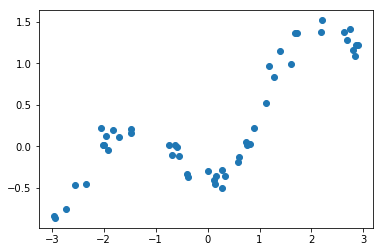

In [3]:
X, s = generate_gp(random_state=4)
y = np.sign(s)
plt.plot(X, s, "o")

In [4]:
gpd = GaussianProcessDistillation(cov=RBF(1, 1), sigma=0.01, rho=1.)
gpd.fit(X, y, s)

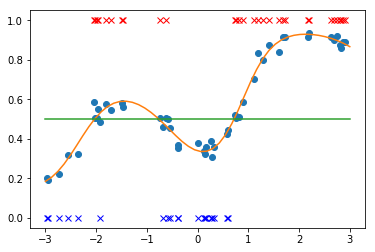

In [5]:
Xgrid = np.linspace(-3, 3).reshape(-1, 1)
fgrid, vgrid = gpd.posterior(Xgrid)
plt.plot(X, norm.cdf(s), "o")
plt.plot(Xgrid, norm.cdf(fgrid))
plt.plot(X[y > 0], np.ones(np.count_nonzero(y > 0)), "rx")
plt.plot(X[y < 0], np.zeros(np.count_nonzero(y < 0)), "bx")
plt.plot(Xgrid, 0.5*np.ones(len(Xgrid)))

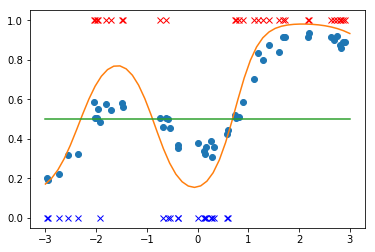

In [6]:
gpd.set_params(rho=0)
gpd.fit(X, y, s)
fgrid, vgrid = gpd.posterior(Xgrid)
plt.plot(X, norm.cdf(s), "o")
plt.plot(Xgrid, norm.cdf(fgrid))
plt.plot(X[y > 0], np.ones(np.count_nonzero(y > 0)), "rx")
plt.plot(X[y < 0], np.zeros(np.count_nonzero(y < 0)), "bx")
plt.plot(Xgrid, 0.5*np.ones(len(Xgrid)))